In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

import time
import os
from keras.layers.advanced_activations import LeakyReLU

In [2]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

path = r"F:\PROJECTS\AI non github\new"
print("Files and directories in a specified path:")
for dirname in os.listdir(path):
    dirpath = os.path.join(path, dirname)
    print(dirpath)
    for filename in os.listdir(dirpath):
        f = os.path.join(dirpath, filename)
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        image = cv2.imread(f)
        image = cv2.resize(image, (32, 32))
        data.append(image)

        # update label list
        labels.append(dirname)
        
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...
Files and directories in a specified path:
F:\PROJECTS\AI non github\new\seledri
F:\PROJECTS\AI non github\new\sirih
Time taken: 4.8 seconds
done


In [3]:
np.array(data).shape

(140, 32, 32, 3)

In [4]:
print(labels)

['seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'siri

In [5]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (112, 32, 32, 3)
Ukuran data test = (28, 32, 32, 3)


In [8]:
# model = Sequential()
# # Extracted Feature Layer
# model.add(InputLayer(input_shape=[32,32,3]))
# model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, padding='same'))
# model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, padding='same'))
# model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='selu'))
# model.add(MaxPool2D(pool_size=2, padding='same'))
# model.add(Dropout(0.25))
# model.add(Flatten())
# # Fully Connected Layer
# model.add(Dense(1024, activation="relu")) 
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPool2D(2, 2))
# model.add(Conv2D(50, (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(50, (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))
# # model.add(Conv2D(128, (3,3), activation='relu'))
# # model.add(MaxPool2D(2,2))
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [10]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 60
opt_funct = Adam(learning_rate=lr)

In [11]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [12]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/60
4/4 [==============================] - 2s 152ms/step - loss: 0.6861 - accuracy: 0.6250 - val_loss: 0.6601 - val_accuracy: 0.5714
Epoch 2/60
4/4 [==============================] - 0s 62ms/step - loss: 0.6057 - accuracy: 0.6607 - val_loss: 0.6245 - val_accuracy: 0.5714
Epoch 3/60
4/4 [==============================] - 0s 61ms/step - loss: 0.5212 - accuracy: 0.6696 - val_loss: 0.5751 - val_accuracy: 0.5714
Epoch 4/60
4/4 [==============================] - 0s 61ms/step - loss: 0.4093 - accuracy: 0.8125 - val_loss: 0.3329 - val_accuracy: 0.8929
Epoch 5/60
4/4 [==============================] - 0s 62ms/step - loss: 0.2166 - accuracy: 0.9375 - val_loss: 0.2205 - val_accuracy: 0.9286
Epoch 6/60
4/4 [==============================] - 0s 62ms/step - loss: 0.1116 - accuracy: 0.9643 - val_loss: 0.1761 - val_accuracy: 0.9286
Epoch 7/60
4/4 [==============================] - 0s 61ms/step - loss: 0.1168 - accuracy: 0.9375 - val_loss: 0.1351 - val_accuracy: 0.9286
Epoch 8/60
4/4 [==========

4/4 [==============================] - 0s 64ms/step - loss: 4.5162e-05 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 59/60
4/4 [==============================] - 0s 65ms/step - loss: 4.3904e-05 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 60/60
4/4 [==============================] - 0s 65ms/step - loss: 4.2807e-05 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000


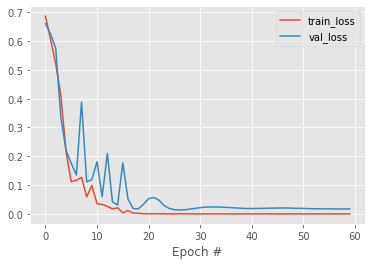

In [13]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

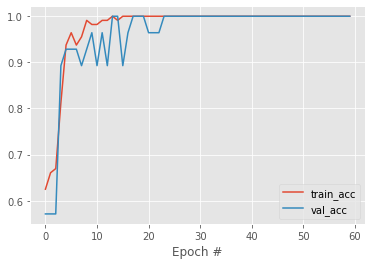

In [14]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [15]:
label_list = ['sirih', 'seledri']

# check acccuracy model for data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

       sirih       1.00      1.00      1.00        16
     seledri       1.00      1.00      1.00        12

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



<ipython-input-15-71eec67b4b63>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


In [34]:
query = cv2.imread("F:\\PROJECTS\\AI\\Dataset\\sirih.jpg")

In [35]:
# uji model menggunakan image lain
# query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[6.892097e-07]]


In [36]:
if q_pred<=0.5 :
    target = "Seledri"
else :
    target = "Sirih"
print(target)
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
cv2.imshow('Output', output)
cv2.waitKey() 
cv2.destroyWindow('Output')

Seledri


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'


In [37]:
import pickle

In [38]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('daun_sirih_seledri_model_cnn.h5')
f = open('daun_sirih_seledri_model_cnn', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...
